# Sparse Logistic SVD: User Guide

## Setup

In [1]:
import slsvd
import numpy as np

print(slsvd.__version__)

0.1.0


In [2]:
import matplotlib.pyplot as plt

## Data Generation

In [3]:
from slsvd.data_generation import generate_data

In [4]:
bin_mat, loadings, scores, diagonal=generate_data(n=100, d=50, rank=2, random_seed=123)

In [5]:
bin_mat.shape

(100, 50)

In [6]:
loadings.shape

(50, 2)

In [7]:
scores.shape

(100, 2)

In [8]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [9]:
np.dot(scores.T, scores)

array([[ 97.96727037,   6.76145461],
       [  6.76145461, 123.53743602]])

In [49]:
np.count_nonzero(loadings, axis=0)

array([20, 20])

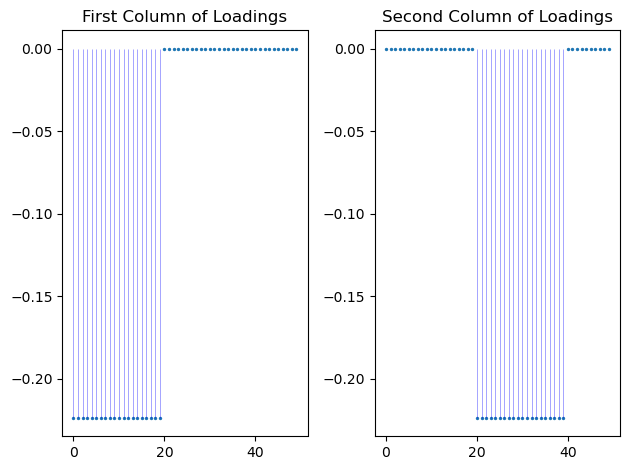

In [10]:
import matplotlib.pyplot as plt

# Plotting the first column
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('First Column of Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)  # Adjust the size parameter
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5, linewidth=0.5)  # Adjust the line width
plt.title('Second Column of Loadings')

plt.tight_layout()
plt.show()


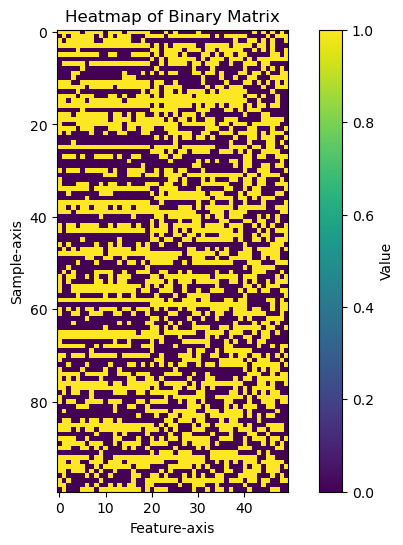

In [11]:
#import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(bin_mat, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Value')
plt.title('Heatmap of Binary Matrix')
plt.xlabel('Feature-axis')
plt.ylabel('Sample-axis')
plt.show()

## Sparse Logistic SVD

In [12]:
from slsvd.slsvd import sparse_logistic_pca

In [13]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca

In [14]:
from slsvd.sparse_logistic_pca import sparse_logistic_pca_coord

In [15]:
#mu, A, B, zeros, BIC, m, loss, lambdas = sparse_logistic_pca(bin_mat, lambda_val=0.1, k=2, procrustes=False, lasso=False)

In [16]:
bin_mat.shape

(100, 50)

In [50]:
thelam=np.logspace(-2, 1, num=10)

In [51]:
thelam

array([ 0.01      ,  0.02154435,  0.04641589,  0.1       ,  0.21544347,
        0.46415888,  1.        ,  2.15443469,  4.64158883, 10.        ])

In [57]:
thelam = np.array([4.64])

In [58]:
mu, A, B, zeros, BIC, m,  lambda_val=sparse_logistic_pca_coord(bin_mat, lambdas=thelam,k=2) 

In [20]:
#mu, A, B, zeros, BIC, m, lambda_val= sparse_logistic_pca(bin_mat, lambda_val=0.01, k=2, procrustes=False, lasso=False)

In [59]:
lambda_val

4.64

In [46]:
m

1

In [60]:
zeros

array([[20., 19.]])

In [61]:
BIC

array([[6182.21458345, 5630.69836639]])

In [62]:
bin_mat.shape

(100, 50)

In [63]:
mu.shape

(50,)

In [64]:
np.mean(mu)

-0.0007832777173002681

In [65]:
A.shape

(100, 2)

In [66]:
B.shape

(50, 2)

In [67]:
zeros

array([[20., 19.]])

In [68]:
np.count_nonzero(A != 0)

200

In [69]:
np.count_nonzero(B[:,0] != 0)

20

In [70]:
np.count_nonzero(B[:,1] != 0)

19

In [71]:
np.dot(B.T, B)

array([[1., 0.],
       [0., 1.]])

In [72]:
np.dot(A.T, A)

array([[3785.08972476,   72.55802661],
       [  72.55802661, 1858.92371081]])

In [73]:
# iterations = np.arange(1, len(loss) + 1)

# # Plot loss values against iteration numbers
# plt.plot(iterations, loss, marker='o', linestyle='-')
# plt.title('Trace plot of logistic SVD')
# plt.xlabel('Iteration')
# plt.ylabel('Loss')
# plt.grid(True)
# plt.show()

## Visualization

In [ ]:
from sklearn.decomposition import PCA

### PCA Visualization

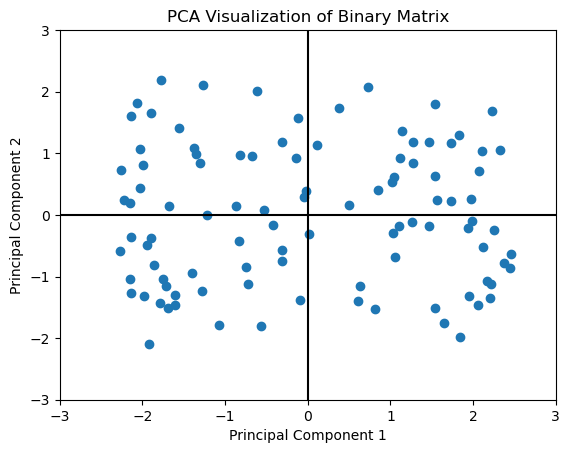

In [ ]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bin_mat)

# Visualize PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Visualization of Binary Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### SVD Visualization

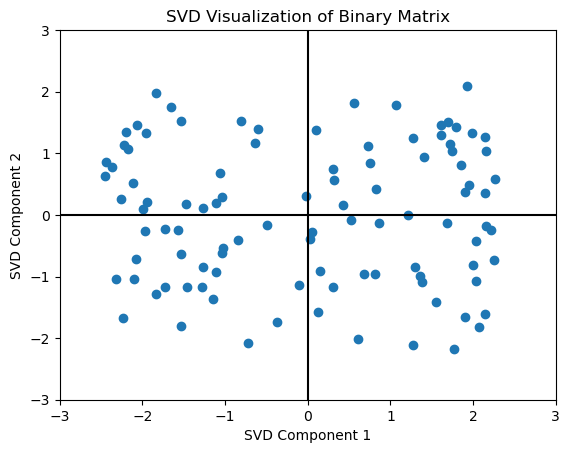

In [ ]:
bin_mat_c = bin_mat - np.mean(bin_mat, axis=0)

# Step 2: Perform SVD on the centered matrix
U, S, Vt = np.linalg.svd(bin_mat_c, full_matrices=False)


# Take the first two components
svd_result = U[:, :2] * S[:2]

# Visualize SVD results
plt.scatter(svd_result[:, 0], svd_result[:, 1])
plt.title('SVD Visualization of Binary Matrix')
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()

### Sparse Logistic PCA Visualization

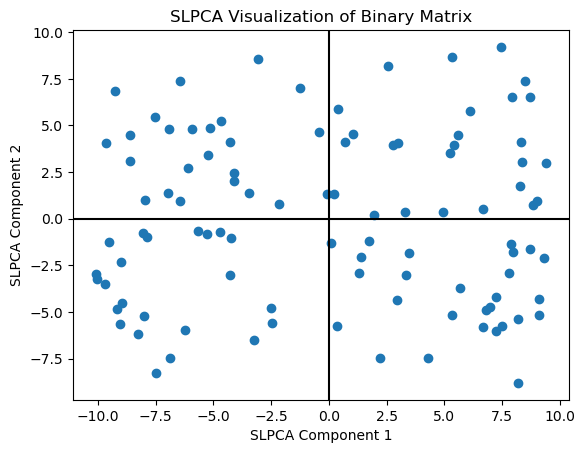

In [ ]:
slpca_result=A
plt.scatter(slpca_result[:, 0], slpca_result[:, 1])
plt.title('SLPCA Visualization of Binary Matrix')
plt.xlabel('SLPCA Component 1')
plt.ylabel('SLPCA Component 2')
plt.axvline(x=0,color='black')
plt.axhline(y=0,color='black')
plt.show()

### Visualization of Loadings

In [ ]:
loadings.shape

(50, 2)

In [ ]:
B.shape

(50, 2)

In [ ]:
np.dot(loadings.T, loadings)

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.dot(B.T, B)

array([[1.        , 0.01707662],
       [0.01707662, 1.        ]])

In [ ]:
np.dot(scores.T, scores)

array([[ 97.96727037,   6.76145461],
       [  6.76145461, 123.53743602]])

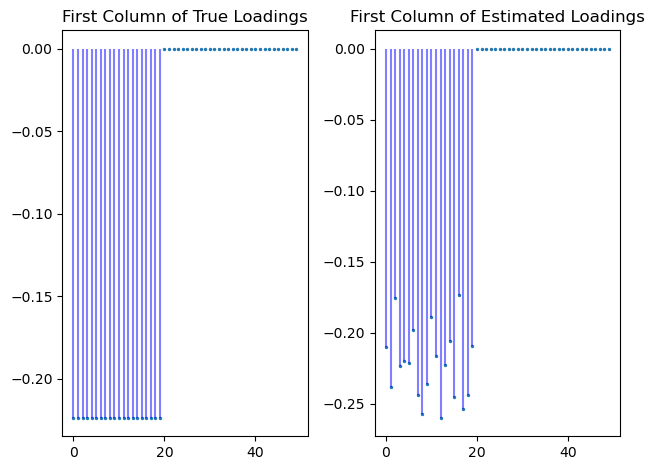

In [74]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 0])), loadings[:, 0], s=2)
for i, val in enumerate(loadings[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of True Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 0])), B[:, 0], s=2)
for i, val in enumerate(B[:, 0]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('First Column of Estimated Loadings')

plt.tight_layout()
plt.show()

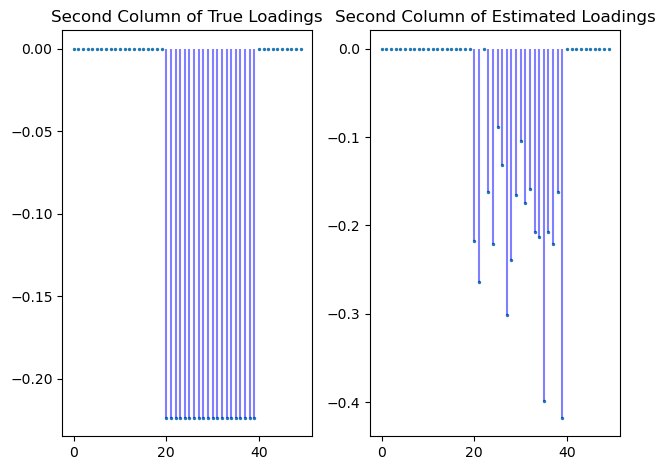

In [75]:
plt.subplot(1, 2, 1)
plt.scatter(range(len(loadings[:, 1])), loadings[:, 1], s=2)
for i, val in enumerate(loadings[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Second Column of True Loadings')

# Plotting the second column
plt.subplot(1, 2, 2)
plt.scatter(range(len(loadings[:, 1])), B[:, 1], s=2)
for i, val in enumerate(B[:, 1]):
    plt.vlines(i, 0, val, color='blue', linestyle='-', alpha=0.5)
plt.title('Second Column of Estimated Loadings')

plt.tight_layout()
plt.show()

In [76]:
B[:, 1]

array([-0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.21779148, -0.26371413, -0.        , -0.16192091, -0.22141256,
       -0.08842908, -0.13165218, -0.30197299, -0.23950707, -0.16518962,
       -0.10393277, -0.174814  , -0.15913522, -0.20762085, -0.2131846 ,
       -0.39899207, -0.20700312, -0.22066132, -0.16178348, -0.41789778,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ])

# Reference

Lee, S., Huang, J. Z., & Hu, J. (2010). Sparse logistic principal components analysis for binary data. The Annals of Applied Statistics, 4(3), 1579.